# Homework 1
## Direct Methods for the solution of Linear Systems.

##### 1. Given a matrix $A ∈ R^{n×n}$ and the vector $x_{true} = (1,1,...,1)^T ∈ R^n$, write a script that:
* Computes the right-hand side of the linear system $b = Ax_{true}$.
* Computes the condition number in 2-norm of the matrix $A$. It is ill-conditioned? What if we use the ∞-norm instead of the 2-norm?
* Solves the linear system $Ax = b$ with the function np.linalg.solve().
* Computes the relative error between the solution computed before and the true solution $x_{true}$.
Remember that the relative error between $x_{true}$ and $x$ in $R^n$ can be computed as $$E(x_{true}, x) = \frac{||x − x_{true}||_2}{||x_{true}||_2}$$
* Plot a graph (using matplotlib.pyplot) with the relative errors as a function of $n$ and (in a new window) the condition number in 2-norm $K_2(A)$ and in ∞-norm, as a function of $n$.

##### 2. Test the program above with the following choices of $A ∈ R^{n×n}$:
* A random matrix (created with the function np.random.rand()) with size varying with $n = {10,20,30,...,100}$.
* The Vandermonde matrix (np.vander) of dimension $n = {5, 10, 15, 20, 25, 30}$ with respect to the vector $x = {1,2,3,...,n}$.
* The Hilbert matrix (scipy.linalg.hilbert) of dimension $n = {4, 5, 6, . . . , 12}$.

In [10]:
#importing libraries___________
import numpy as np
import matplotlib.pyplot as plt
import scipy

#defining random state for reproducibility__
np.random.seed(42)

In [11]:
#returns the condition number and relative error given a matrix A and a list of dimensions n__
def test_matrix(matrix_, n_):
    cond_num_2norm = []
    cond_num_infnorm = []
    rel_err = []
    
    for dim in n_:
        x_true = np.ones((dim, ))
        
        #initialize matrix A (random, hilbert, vandermonde)__
        if matrix_ == 'random':
            A = np.random.rand(dim, dim)
        elif matrix_ == 'vandermonde':
            v = np.arange(1, dim+1)                                                 #create a vector from to make column vander from x1 to xn (values with which to make the vandermonde matrix)             
            A = np.vander(v, N = dim)                                               #N number of columns in the output (till x^n-1)
        elif matrix_ == 'hilbert':
            A = scipy.linalg.hilbert(dim)
        
        b = A@x_true                                                                #compute right hand side of b = Ax_{true}
        
        #compute the condition number (|A^(-1)|*|A|) of the matrix__
        cond_num_2norm.append(np.linalg.cond(A, p = None))                          #p = 2 is default
        cond_num_infnorm.append(np.linalg.cond(A, p = np.inf))                      #infinity norm
        
        x = np.linalg.solve(A, b)                                                   #solve the system of equations
        
        rel_err.append( np.linalg.norm( (x-x_true) ) / np.linalg.norm(x_true) )     #compute the relative error
        
    return cond_num_2norm, cond_num_infnorm, rel_err

def plot_rel_err(rel_err_, n_, matrix_type_):
    plt.xlabel("Dimension")
    plt.ylabel("Relative Error")
    plt.plot(n_, rel_err_, label = "Relative Error")
    plt.title(f'{matrix_type_} matrix')
    plt.grid()
    plt.show()
   
def plot_cond(k2_, kinf_, n_, matrix_type_):
    plt.xlabel("Dimension")
    plt.ylabel("Condition Number")
    plt.plot(n_, k2_, label = "2-norm")
    plt.plot(n_, kinf_, label = "infinity-norm")
    plt.title(f'{matrix_type_} matrix')
    plt.legend()
    plt.grid()
    plt.show()

Testing with random matrix (created with the function np.random.rand()) with size varying with n = {10,20,30,...,100}.

n =  10
Condition number in 2-norm:  61.4788415067078
Condition number in infinity-norm:  113.56024648813526
Relative error:  8.706583865735264e-16


n =  20
Condition number in 2-norm:  563.2365079165877
Condition number in infinity-norm:  1350.8655162307311
Relative error:  1.2621824741668033e-14


n =  30
Condition number in 2-norm:  328.39839525945973
Condition number in infinity-norm:  727.0680317317242
Relative error:  3.114170636551699e-15


n =  40
Condition number in 2-norm:  1000.8203590565968
Condition number in infinity-norm:  2566.187095665369
Relative error:  7.705719629198142e-15


n =  50
Condition number in 2-norm:  632.4879599189057
Condition number in infinity-norm:  1524.58165222968
Relative error:  1.0397995837717828e-14


n =  60
Condition number in 2-norm:  19607.00304284847
Condition number in infinity-norm:  52578.31211547991
Relative error:  2.3243971386570756e-14


n =  70
Condition number in 2-norm:  7407.221874240996
Condition number in infinity-norm:  2144

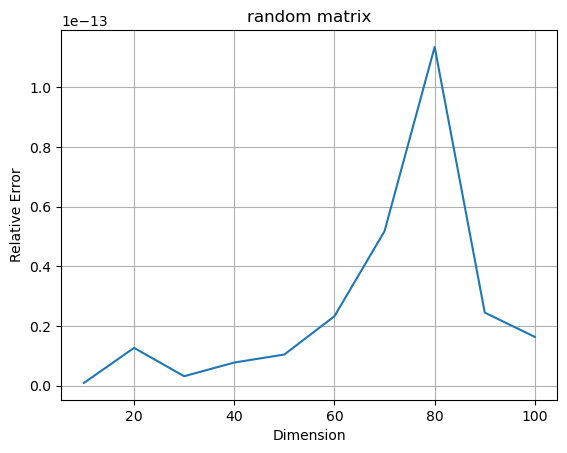

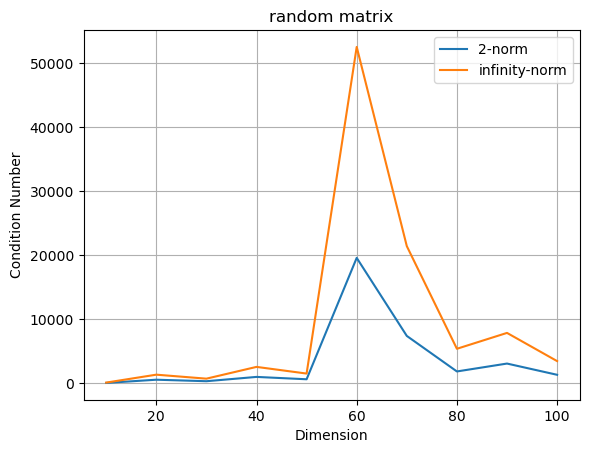

In [12]:
#calling test for random matrix________________________________________
matrix_type = 'random'
n = np.arange(10, 100 + 10, 10)
cond_num_2norm, cond_num_infnorm, rel_err = test_matrix(matrix_type, n)

for i in range(len(n)):
    print("n = ", n[i])
    print("Condition number in 2-norm: ", cond_num_2norm[i])
    print("Condition number in infinity-norm: ", cond_num_infnorm[i])
    print("Relative error: ", rel_err[i])
    print("\n")
    
#plotting relative error random matrix__________________________________
plot_rel_err(rel_err, n, matrix_type)

#plotting condition number in 2-norm and infinity norm random matrix____
plot_cond(cond_num_2norm, cond_num_infnorm, n, matrix_type)



Testing with Vandermonde matrix (np.vander) of dimension n = {5, 10, 15, 20, 25, 30} with respect to the vector x = {1,2,3,...,n}.

n =  5
Condition number in 2-norm:  26169.687970633924
Condition number in infinity-norm:  43736.00000000027
Relative error:  1.4307428223546391e-13


n =  10
Condition number in 2-norm:  2106257536923.9373
Condition number in infinity-norm:  3306440916791.0586
Relative error:  2.494592926949303e-07


n =  15
Condition number in 2-norm:  2.5824111067829366e+21
Condition number in infinity-norm:  4.364079294735841e+21
Relative error:  59.33827167956305


n =  20
Condition number in 2-norm:  4.608777105868848e+23
Condition number in infinity-norm:  1.112149488299017e+24
Relative error:  37845.461509763685


n =  25
Condition number in 2-norm:  2.0357824532076166e+22
Condition number in infinity-norm:  6.351061332677494e+22
Relative error:  100569.45470999631


n =  30
Condition number in 2-norm:  5.098969447351721e+21
Condition number in infinity-norm:  2.4729337111704997e+22
Relative error:  46014.41260759906




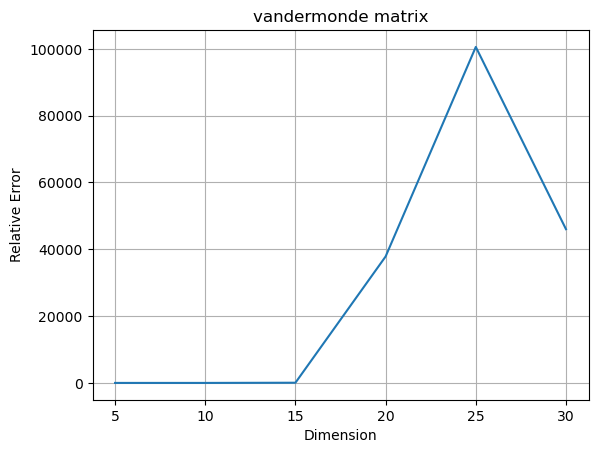

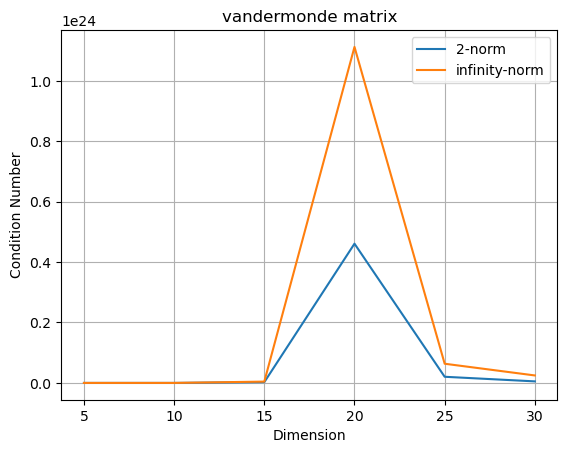

In [13]:
#calling test for vandermonde matrix________________________________________
matrix_type = 'vandermonde'
n = np.arange(5, 30 + 5, 5)
cond_num_2norm, cond_num_infnorm, rel_err = test_matrix(matrix_type, n)

for i in range(len(n)):
    print("n = ", n[i])
    print("Condition number in 2-norm: ", cond_num_2norm[i])
    print("Condition number in infinity-norm: ", cond_num_infnorm[i])
    print("Relative error: ", rel_err[i])
    print("\n")
    
#plotting relative error random matrix__________________________________
plot_rel_err(rel_err, n, matrix_type)

#plotting condition number in 2-norm and infinity norm random matrix____
plot_cond(cond_num_2norm, cond_num_infnorm, n, matrix_type)

As $N$ increases, the condition number of the Vandermonde Matrix tends to grow, making the matrix more ill-conditioned. This is because the columns become more linearly dependent.

n =  4
Condition number in 2-norm:  15513.738738929662
Condition number in infinity-norm:  28374.999999997905
Relative error:  9.744718162133152e-14


n =  5
Condition number in 2-norm:  476607.2502419222
Condition number in infinity-norm:  943655.9999995853
Relative error:  2.0813331825304352e-13


n =  6
Condition number in 2-norm:  14951058.641931808
Condition number in infinity-norm:  29070279.002734546
Relative error:  1.4767120456438312e-10


n =  7
Condition number in 2-norm:  475367356.51983196
Condition number in infinity-norm:  985194889.5122976
Relative error:  7.476410039078477e-10


n =  8
Condition number in 2-norm:  15257576058.834227
Condition number in infinity-norm:  33872791273.195038
Relative error:  1.5758131006458197e-07


n =  9
Condition number in 2-norm:  493153909929.7127
Condition number in infinity-norm:  1099651742192.6724
Relative error:  6.36037108157759e-06


n =  10
Condition number in 2-norm:  16024897439077.97
Condition number in infinity-norm:  35354

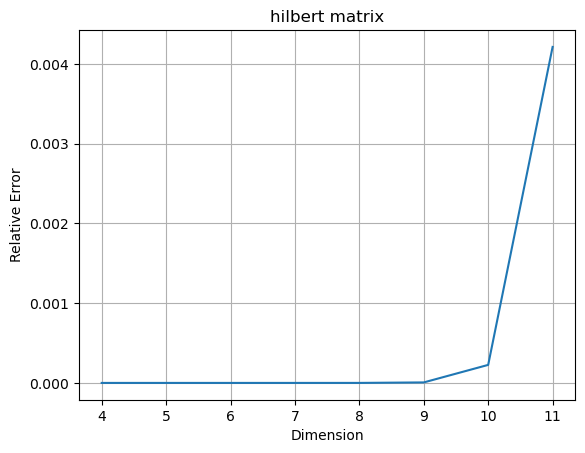

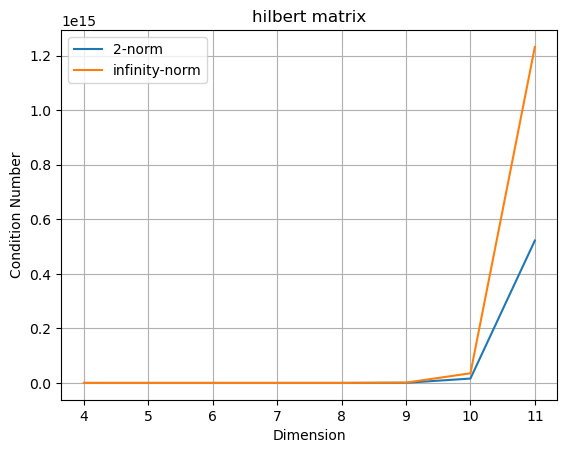

In [14]:
#calling test for hilbert matrix________________________________________
matrix_type = 'hilbert'
n = np.arange(4, 12, 1)
cond_num_2norm, cond_num_infnorm, rel_err = test_matrix(matrix_type, n)

for i in range(len(n)):
    print("n = ", n[i])
    print("Condition number in 2-norm: ", cond_num_2norm[i])
    print("Condition number in infinity-norm: ", cond_num_infnorm[i])
    print("Relative error: ", rel_err[i])
    print("\n")
    
#plotting relative error random matrix__________________________________
plot_rel_err(rel_err, n, matrix_type)

#plotting condition number in 2-norm and infinity norm random matrix____
plot_cond(cond_num_2norm, cond_num_infnorm, n, matrix_type)

The determinant of an $n \times n$ Hilbert matrix scales roughly as $\frac{1}{\sqrt{n}}$ , which means that as $n$ increases, the determinant becomes very small. This small determinant implies that the matrix is close to singular, and its inverse may have large entries, leading to numerical instability in solving linear systems or performing other computations involving the matrix.

($det(A)=0$ property of singular matrix).

As we can see from the results above, we have a big condition number at the increase of $N$, meaning the problems are $\textbf{ill conditioned}$.
Using the inifinity norm highens the condition number.

The condition number of a matrix $A$, denoted as $K(A)$, is a measure of how sensitive the solution of a system of linear equations is to errors in the data. It provides an upper bound on the relative error in the solution due to $\textbf{inherent errors}$.

K2(A) and $K∞(A)$ are condition numbers calculated with respect to different norms (the 2-norm and the infinity norm, respectively). They both measure the sensitivity of the system, but in slightly different ways due to the properties of the different norms. Despite these differences, their overall trends are similar because they are both fundamentally measuring the same property of the matrix: its condition number.

The definition of ill-conditioning does depend on the norm used. A matrix is said to be ill-conditioned if its condition number is large, which means the system is highly sensitive to errors in the data. However, what constitutes a "large" condition number can depend on the norm used.

There is indeed a relationship between the condition number of a matrix and the relative error $E(x_{true}, x)$ of the computed solution. The condition number provides an upper bound on the relative error
$||\frac{\Delta x}{x}|| \leq ||A^{-1}|| \cdot ||A|| \cdot ||\frac{\Delta b}{b}||$

That is, if $K(A)$ is the condition number of $A$, then the relative error is at most roughly $K(A)$ times the relative error in the data. This means that a large condition number can lead to a large relative error, even if the relative error in the data is small.

## Floating point arithmetic

1. The Machine epsilon ε is the distance between 1 and the next floating point number. Compute ε, which is defined as the smallest floating point number such that it holds:
$$fl(1 + ε) > 1$$


In [15]:
#initializing epsilon to 1.0__
epsilon = 1.0

#loop to find the smallest epsilon such that 1.0 + epsilon > 1.0__
while 1.0 + epsilon > 1.0:
    epsilon /= 2.0

#when condition not met epsilon has been halved, so double it again__
epsilon *= 2.0

print(epsilon)


2.220446049250313e-16


2. Let’s consider the sequence $a_n = (1 + \frac{1}{n} )^n$ . It is well known that: $$\lim_{{n \to \infty}} a_n = e$$

Choose different values for n, compute an and compare it to the real value of the Euler costant. What happens if you choose a large value of n? Guess the reason.

In [16]:
import math

real_e = math.e
vals = [1, 10, 100, 1000, 10000, 100000, 1000000, 100000000000, 100000000000000000]
diffs = []

for n in vals:
    an = (1 + 1/n)**n
    diffs.append(abs(real_e - an))
    print(f"For n={n}, an={an} and the difference to the real value of e is {diffs[-1]}")

For n=1, an=2.0 and the difference to the real value of e is 0.7182818284590451
For n=10, an=2.5937424601000023 and the difference to the real value of e is 0.12453936835904278
For n=100, an=2.7048138294215285 and the difference to the real value of e is 0.01346799903751661
For n=1000, an=2.7169239322355936 and the difference to the real value of e is 0.0013578962234515046
For n=10000, an=2.7181459268249255 and the difference to the real value of e is 0.000135901634119584
For n=100000, an=2.7182682371922975 and the difference to the real value of e is 1.359126674760347e-05
For n=1000000, an=2.7182804690957534 and the difference to the real value of e is 1.359363291708604e-06
For n=100000000000, an=2.71828205335711 and the difference to the real value of e is 2.248980650598753e-07
For n=100000000000000000, an=1.0 and the difference to the real value of e is 1.718281828459045


If $n$ is a very large number, the term $1/n$ becomes extremely small, close to the machine's precision limit. In floating point arithmetic, adding a very small number to 1 might still result in 1 since the computer can't distinguish between 1 and 1 plus a very small number.

3. Let’s consider the matrices:
$$A = \begin{bmatrix}
4 & 2 \\
1 & 3
\end{bmatrix}$$
$$B = \begin{bmatrix}
4 & 2 \\
2 & 1
\end{bmatrix}$$
Compute the rank of A and B and their eigenvalues. Are A and B full-rank matrices? Can you infer some relationship between the values of the eigenvalues and the full-rank condition? Please, corroborate your deduction with other examples.


In [17]:
import numpy as np

# Define matrices A and B
A = np.array([[4, 2], [1, 3]])
B = np.array([[4, 2], [2, 1]])

# Compute the rank of A and B
rank_A = np.linalg.matrix_rank(A)
rank_B = np.linalg.matrix_rank(B)

# Compute the eigenvalues of A and B
eigenvalues_A = np.linalg.eigvals(A)
eigenvalues_B = np.linalg.eigvals(B)

print(f"Rank of A: {rank_A}, Eigenvalues of A: {eigenvalues_A}")
print(f"Rank of B: {rank_B}, Eigenvalues of B: {eigenvalues_B}")

Rank of A: 2, Eigenvalues of A: [5. 2.]
Rank of B: 1, Eigenvalues of B: [5. 0.]


The rank of a matrix can be defined as being the number of non-zero eigenvalues of the matrix.